In [1]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from neo4j_runway import Discovery
from neo4j_runway.llm.openai import OpenAIDataModelingLLM, OpenAIDiscoveryLLM
from neo4j_runway.utils.data import load_data_dictionary_from_yaml, load_local_files

from dotenv import load_dotenv

load_dotenv()

True

# Load Data

In [3]:
use_cases = ["How many subregions are in a region and how many countries are in a subregion?",
    "What is the most common currency?",
    "Which subregions contain the most cities?"]
data_dictionary = load_data_dictionary_from_yaml("./data_dictionary.yaml")
data = load_local_files(data_directory="../../data/countries/", general_description="These files contain information on countries.", use_cases=use_cases, data_dictionary=data_dictionary)

# Discovery

In [4]:
disc_llm = OpenAIDiscoveryLLM(model_name="gpt-4o-mini-2024-07-18", enable_async=True)
discovery = Discovery(llm=disc_llm, data=data)

In [5]:
discovery.run_async(num_calls=3)

### Summary of Insights for Graph Data Model

#### Unique Identifiers:
- **Country ID**: Unique identifier for each country.
- **State ID**: Unique identifier for each state (subregion).
- **City ID**: Unique identifier for each city.

#### Significant Properties:
- **Country Name**: Name of the country.
- **State Name**: Name of the state (subregion).
- **City Name**: Name of the city.
- **Currency**: Currency used by the country.
- **Region**: Broad geographical classification of the country.
- **Subregion**: More specific geographical classification within a region.

#### Possible Node Labels:
1. **Country**: Represents each country in the dataset.
2. **State**: Represents each state (subregion) within a country.
3. **City**: Represents each city within a state.

#### Possible Relationships:
- **HAS_SUBREGION**: Connects a Country node to its State nodes, indicating which states belong to which country.
- **HAS_CITY**: Connects a State node to its City nodes, indicating which cities are located within which state.

#### Use Case Considerations:
1. **Subregions and Countries**: 
   - The **HAS_SUBREGION** relationship will allow for counting the number of states (subregions) within a country and the number of countries within each subregion.

2. **Most Common Currency**: 
   - The Currency property in the Country node will help identify the most common currency used across countries, with a focus on the Euro (EUR) as the most prevalent.

3. **Subregions with Most Cities**: 
   - The **HAS_CITY** relationship will facilitate counting the number of cities associated with each state (subregion), allowing for the identification of subregions with the highest city counts.

### Conclusion
This graph data model will effectively address the specified use cases by leveraging unique identifiers, significant properties, and well-defined relationships between countries, states, and cities.

In [6]:
# with open("./outputs/final_discovery.md") as f:
#     discovery = f.read()

In [7]:
# print(discovery)

## Save Insights

In [8]:
# discovery.to_markdown(file_dir="./outputs/")

# Data Modeling

In [9]:
from neo4j_runway import GraphDataModeler

In [10]:
modeling_llm = OpenAIDataModelingLLM(model_name="gpt-4o-2024-08-06")
gdm = GraphDataModeler(llm=modeling_llm, discovery=discovery, data_dictionary=data_dictionary)

In [14]:
gdm.create_initial_model(use_advanced_data_model_generation_rules=False, use_yaml_data_model=True)

Entity Pool Generation Attempt: 1

 Please generate a pool of entities that will be used to construct a graph data model. Here are the initial discovery findings:
### Summary of Insights for Graph Data Model

#### Unique Identifiers:
- **Country ID**: Unique identifier for each country.
- **State ID**: Unique identifier for each state (subregion).
- **City ID**: Unique identifier for each city.

#### Significant Properties:
- **Country Name**: Name of the country.
- **State Name**: Name of the state (subregion).
- **City Name**: Name of the city.
- **Currency**: Currency used by the country.
- **Region**: Broad geographical classification of the country.
- **Subregion**: More specific geographical classification within a region.

#### Possible Node Labels:
1. **Country**: Represents each country in the dataset.
2. **State**: Represents each state (subregion) within a country.
3. **City**: Represents each city within a state.

#### Possible Relationships:
- **HAS_SUBREGION**: Connects a

AttributeError: 'str' object has no attribute 'model_dump_json'

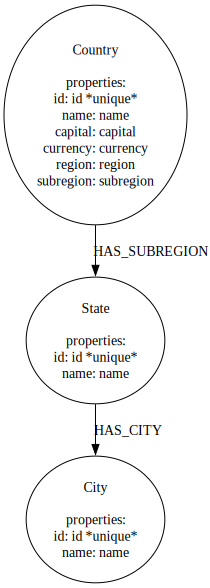

In [12]:
gdm.current_model.visualize()

In [13]:
corrections = "Create a node Currency with the unique property currency."

gdm.iterate_model(corrections=corrections)

TypeError: create_data_modeling_prompt() missing 1 required positional argument: 'valid_columns'